In [1]:
# Importing Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df=pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7050, 16)

In [4]:
# dropping useless columns
df.drop(columns=['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

In [5]:
# checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [6]:
# Checking Null Values
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [7]:
# Viewing Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [8]:
# Exploring features
for features in df.columns:
    unq=df[features].nunique()
    print(f"\n\nNumber of unique values in {features} - {unq}")
    print(df[features].head())
    



Number of unique values in status_id - 6997
0    246675545449582_1649696485147474
1    246675545449582_1649426988507757
2    246675545449582_1648730588577397
3    246675545449582_1648576705259452
4    246675545449582_1645700502213739
Name: status_id, dtype: object


Number of unique values in status_type - 4
0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object


Number of unique values in status_published - 6913
0     4/22/2018 6:00
1    4/21/2018 22:45
2     4/21/2018 6:17
3     4/21/2018 2:29
4     4/18/2018 3:22
Name: status_published, dtype: object


Number of unique values in num_reactions - 1067
0    529
1    150
2    227
3    111
4    213
Name: num_reactions, dtype: int64


Number of unique values in num_comments - 993
0    512
1      0
2    236
3      0
4      0
Name: num_comments, dtype: int64


Number of unique values in num_shares - 501
0    262
1      0
2     57
3      0
4      0
Name: num_shares, dtype: int64


Number of unique values i

In [9]:
# Dropping column which we can not use for Clustering
df.drop(columns=['status_id','status_published'],axis=1,inplace=True)

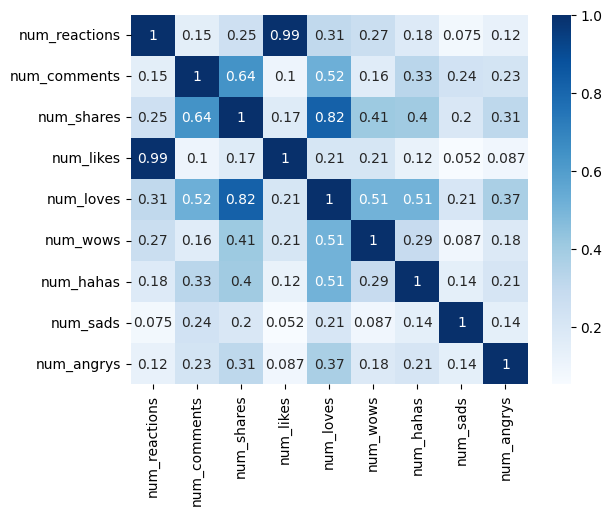

In [10]:
sns.heatmap(df.drop(columns=['status_type'],axis=1).corr(),annot=True,cmap='Blues')
plt.show()

In [11]:
# Splitting dataset into feature and target target
X=df
y=df['status_type']

In [12]:
# Label Encoding
label_encoder=LabelEncoder()
X['status_type']=label_encoder.fit_transform(X['status_type'])
y=label_encoder.fit_transform(y)

In [13]:
# Feature Scaling to Normalize the Data
cols=df.columns

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

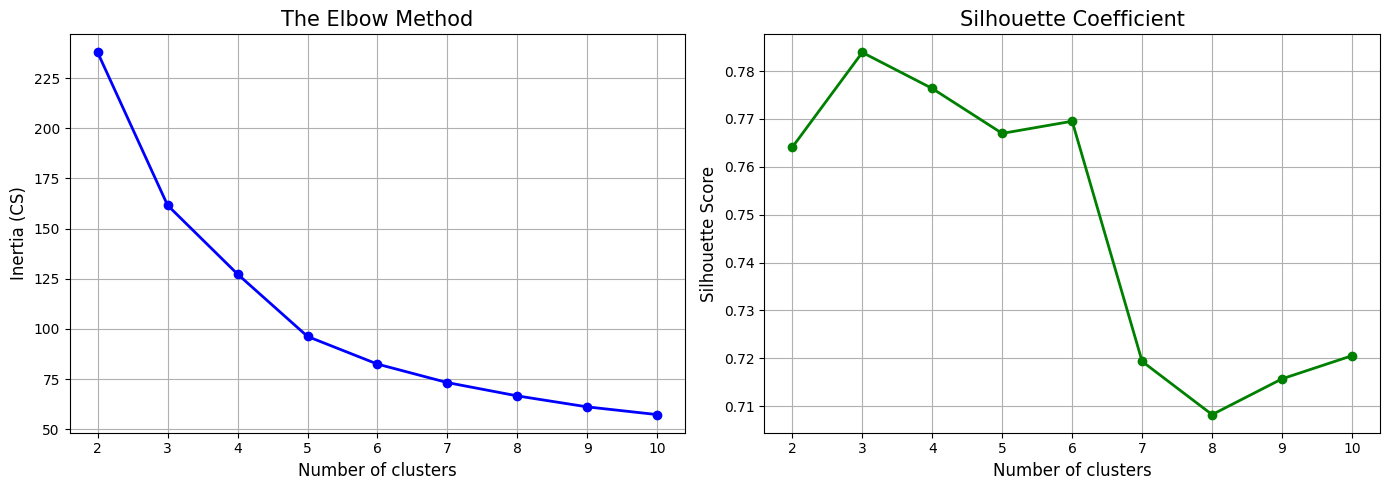

In [14]:
# Identifying Optimal K Value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cs = []
silhouette_coefficients = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(X, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method plot
axes[0].plot(range(2, 11), cs, marker='o', linestyle='-', color='b', linewidth=2)
axes[0].set_title('The Elbow Method', fontsize=15)
axes[0].set_xlabel('Number of clusters', fontsize=12)
axes[0].set_ylabel('Inertia (CS)', fontsize=12)
axes[0].grid(True)

# Silhouette Score plot
axes[1].plot(range(2, 11), silhouette_coefficients, marker='o', linestyle='-', color='g', linewidth=2)
axes[1].set_title('Silhouette Coefficient', fontsize=15)
axes[1].set_xlabel('Number of clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

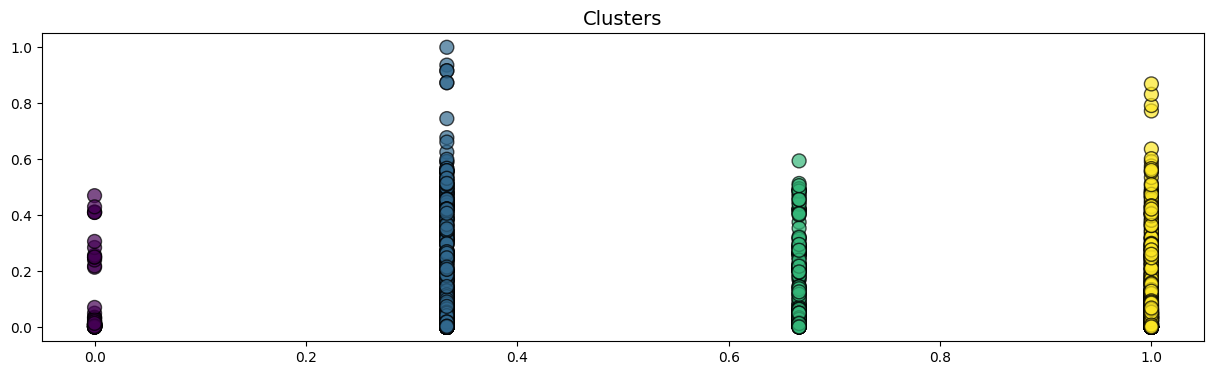

In [15]:
# Creating Clusters
plt.figure(figsize=(15, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
plt.title('Clusters', fontsize=14)
plt.grid(False)
plt.show()

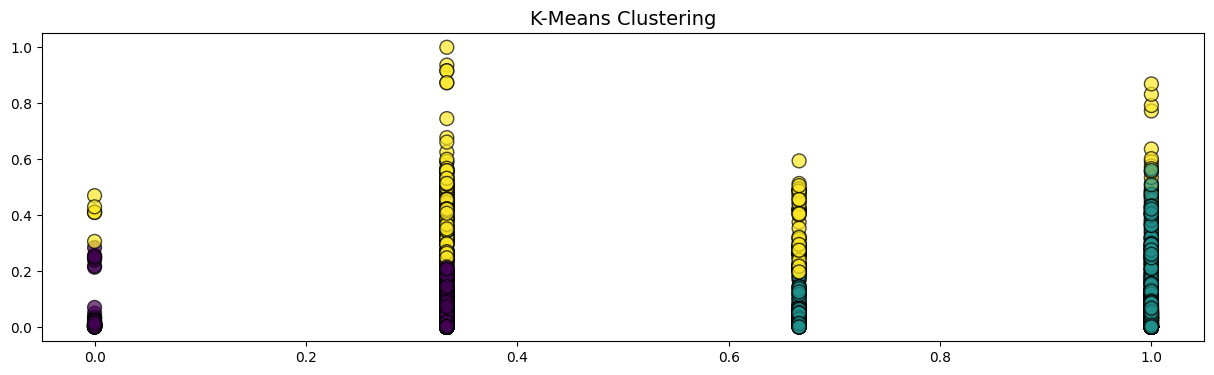

In [16]:
# Seleting k=3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(X)

# Scatterplot the first two principal components with different colors based on cluster labels
plt.figure(figsize=(15, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
plt.title('K-Means Clustering', fontsize=14)
plt.grid(False)
plt.show()

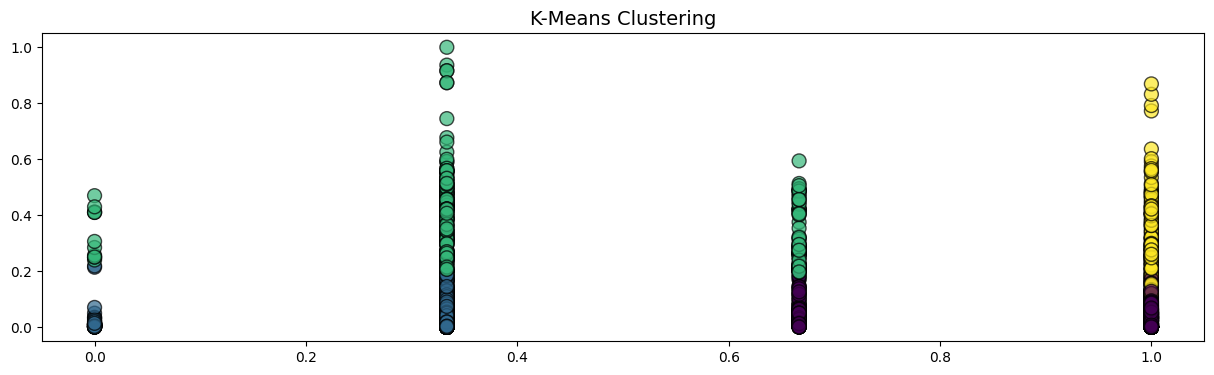

In [17]:
# Seleting k=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(X)

# Scatterplot the first two principal components with different colors based on cluster labels
plt.figure(figsize=(15, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=100, edgecolors='k', alpha=0.7)
plt.title('K-Means Clustering', fontsize=14)
plt.grid(False)
plt.show()